In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train :", x_train.shape, "y_train :", y_train.shape)
print("x_test :", x_test.shape, "y_test :", y_test.shape)

x_train : (60000, 28, 28) y_train : (60000,)
x_test : (10000, 28, 28) y_test : (10000,)


In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3


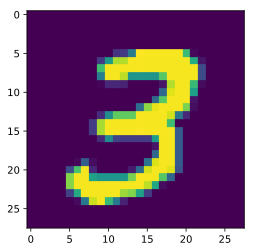

In [35]:
print(y_train[7])
plt.imshow(x_train[7])

In [40]:
#Pre-Processing - Input Data
# 1: Reshape the data
# 2: Noralize the data (all values between 0 to 1)

x_train_reshape = x_train.reshape(60000, 28 * 28)
x_test_reshape = x_test.reshape(10000, 28 * 28)

print(y_train[7])
print(x_train_reshape[7])


x_train_reshape = x_train_reshape/255
x_test_reshape = x_test_reshape/255

print(y_train[7])
print(x_train_reshape[7])



3
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  38  43 105 255 253 253 253 253 253 174   6
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  43 139 224
 226 252 253 252 252 252 252 252 252 158  14   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252 252 252
 252 252  59   0   0   0   0   0   0   0   0   0   0   0   0   0   0 109
 252 252 230 132 133 132 132 189 252 252 252 252 

In [57]:
#THE TENSORFLOW SESSION
tfSession = tf.Session()

In [45]:

y_train_reshape = tfSession.run(tf.one_hot(y_train, 10))
y_test_reshape = tfSession.run(tf.one_hot(y_test, 10))

print(y_train[7])
print(y_train_reshape[7])

3
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


In [47]:
# hyper parameters
learning_rate = 0.01
epochs = 20
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

## lets see how to determine the shape of W and B

$\mathbf{Y}=\sigma(\mathbf{X}\cdot\mathbf{W} + \mathbf{B})$

$ 
\begin{pmatrix}
    y_1 \\ y_2 \\ \vdots \\ y_{10}
\end{pmatrix}=\sigma\left[
\begin{pmatrix}
    x_1 & x_2 & \dots & x_{784}
\end{pmatrix}
\begin{pmatrix}
    w_{1, 1} & w_{1, 2}  & \dots  & w_{1, 10} \\
    w_{2, 1} & w_{2, 2}  & \dots  & w_{2, 10} \\
    \vdots &  \vdots & \ddots & \vdots \\
    w_{784, 1} & w_{784, 2}  & \dots  & w_{784, 10}
\end{pmatrix} +
\begin{pmatrix}
    b_1 \\ b_2 \\ \vdots \\ b_{10}
\end{pmatrix}
\right]
$

#### Weights shape: 784, 10

#### Bias shape: 10

In [50]:
#INPUTS

# X is our "flattened / normalized" images
# Y is our "one hot" labels
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [51]:
#WEIGHTS & BIASES

# weights convert X to same shape as Y
# bias is the same shape as Y
W = tf.Variable(0.1 * np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(0.1 * np.random.randn(10).astype(np.float32))

# The SoftMax Activation function 

The equation of softmax

![Machine learning](images/softMaxEq.png)

![Machine learning](images/softMax.png)


The outputs of softmax

![Machine learning](images/softMaxProb.png)

In [72]:
#THE GRAPH
pred = tf.nn.softmax(tf.add(tf.matmul(X, W), B))

In [73]:
#THE COST FUNCTION
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis=1))

In [74]:
#THE OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [75]:
# Initialize the global variables 
tfSession.run(tf.global_variables_initializer())

In [79]:
# THE TRAINING 
# run the 
for epoch in range(epochs):
    for i in range(batches):
        offset = i * epoch
        x = x_train_reshape[offset: offset + batch_size]
        y = y_train_reshape[offset: offset + batch_size]
        tfSession.run(optimizer, feed_dict={X: x, Y:y})
        c = tfSession.run(cost, feed_dict={X:x, Y:y})

    if not epoch % 2:
        print("epoch :", epoch, "cost=", c)
        

epoch : 0 cost= 0.0512334
epoch : 2 cost= 0.276393
epoch : 4 cost= 0.228207
epoch : 6 cost= 0.336562
epoch : 8 cost= 0.321369
epoch : 10 cost= 0.134713
epoch : 12 cost= 0.49333
epoch : 14 cost= 0.358099
epoch : 16 cost= 0.324262
epoch : 18 cost= 0.189854
Accuracy : 90.6899988651


In [78]:
# THE TESTING 
# identify the accuracy 

correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

acc = tfSession.run(accuracy, feed_dict={X: x_test_reshape, Y: y_test_reshape})
print("Accuracy :", acc * 100)



Accuracy : 90.6099975109
